In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme() # Produce white grid background

In [11]:
df = pd.read_csv('../data/Advertising.csv')
df.columns = df.columns.str.lower() # Lowercase all column names

In [12]:
df.head()

,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [13]:
# Finding advertising relationship between total spend and sales
df['total_spend'] = df['tv'] + df['radio'] + df['newspaper']

In [14]:
df.head()

,tv,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


Simple reminder: y = mx + b
* y = how far up
* x = how far along
* m = slope or gradient (how steepp the line is)
* b = value of y when x = 0

In [ ]:
# Simple reminder - y = mx + b
'''
'''

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

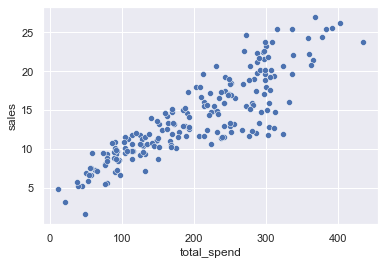

In [15]:
# Identify relationship between total_Spend and sales with scatterplot
sns.scatterplot(data=df,x='total_spend',y='sales')

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

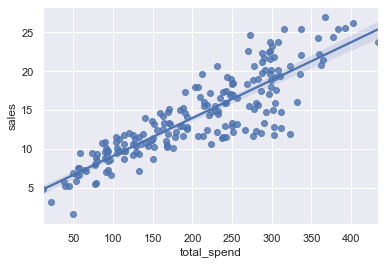

In [16]:
# Another scatterplot with regression plot
sns.regplot(data=df,x='total_spend', y='sales')

In [17]:
X = df['total_spend'] # Feature metric
y = df['sales'] # Target output

In [19]:
# y = mx + b
# y = B1x + B0
#help(np.polyfit)

In [20]:
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [21]:
potential_spend = np.linspace(0,500,100)

In [23]:
predicted_sales = 0.04868788*potential_spend + 4.24302822

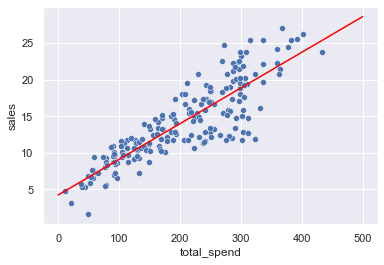

In [24]:
sns.scatterplot(x='total_spend', y='sales', data=df)
plt.plot(potential_spend,predicted_sales, color='red')

In [27]:
# When spending 200 - we're expected to get about $14 dollars
spend = 200
predicted_sales = 0.04868788* spend + 4.24302822

In [28]:
predicted_sales

13.98060422

# Linear Regression with Sckit-Learn

Reminder:
* Dependent Variable (response) - outcome - total spend
* Independent Variable (predictors/explanatory) - advertising channel

In [29]:
# What is the relationship between each advertising channel (TV, Radio, Newspaper) and sales?
df.head()

,tv,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


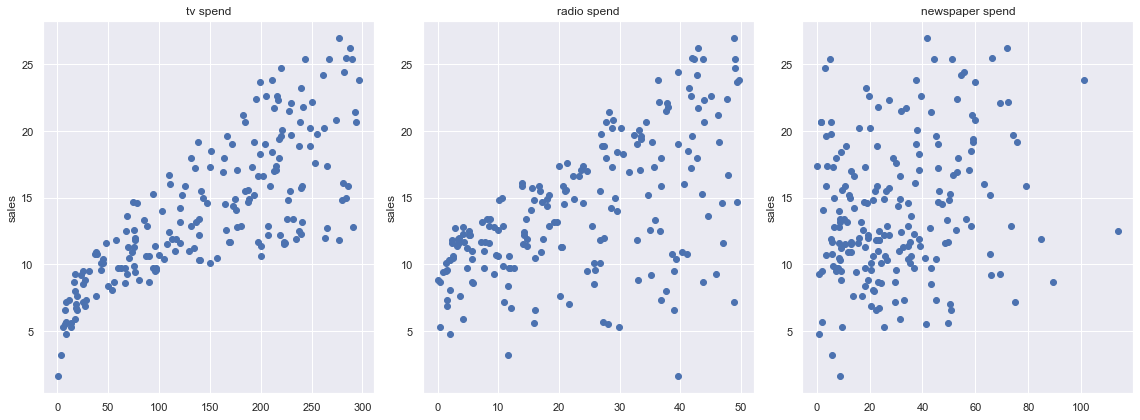

In [31]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['tv'], df['sales'], 'o')
axes[0].set_ylabel('sales')
axes[0].set_title('tv spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel('sales')
axes[1].set_title('radio spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('sales')
axes[2].set_title('newspaper spend')

plt.tight_layout()

In [34]:
X = df.drop(['sales','total_spend'],axis=1)

In [35]:
X

,tv,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [36]:
y = df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [39]:
X_train

,tv,radio,newspaper
42,293.6,27.7,1.8
189,18.7,12.1,23.4
90,134.3,4.9,9.3
136,25.6,39.0,9.3
51,100.4,9.6,3.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [40]:
y_train

42     20.7
189     6.7
90     11.2
136     9.5
51     10.7
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 134, dtype: float64

In [41]:
len(X_test)

66

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
model = LinearRegression() # Instantiate

In [44]:
model.fit(X_train,y_train)

LinearRegression()

In [45]:
model.predict(X_test)

array([16.58673085, 21.18622524, 21.66752973, 10.81086512, 22.25210881,
       13.31459455, 21.23875284,  7.38400509, 13.43971113, 15.19445383,
        9.01548612,  6.56945204, 14.4156926 ,  8.93560138,  9.56335776,
       12.10760805,  8.86091137, 16.25163621, 10.31036304, 18.83571624,
       19.81058732, 13.67550716, 12.45182294, 21.58072583,  7.67409148,
        5.67090757, 20.95448184, 11.89301758,  9.13043149,  8.49435255,
       12.32217788,  9.99097553, 21.71995241, 12.64869606, 18.25348116,
       20.17390876, 14.20864218, 21.02816483, 10.91608737,  4.42671034,
        9.59359543, 12.53133363, 10.14637196,  8.1294087 , 13.32973122,
        5.27563699,  9.30534511, 14.15272317,  8.75979349, 11.67053724,
       15.66273733, 11.75350353, 13.21744723, 11.06273296,  6.41769181,
        9.84865789,  9.45756213, 24.32601732,  7.68903682, 12.30794356,
       17.57952015, 15.27952025, 11.45659815, 11.12311877, 16.60003773,
        6.90611478])

## Regression Metrics
metrics designed for continuous values
 * Mean Absolute Error (MAE) - Mean of the absolute value of errors - does ot punish large errors (outliers)
 * Mean Squared Error (MSE) - Larger erorrs are punished more than with MAE. - Different units than y - units of y squared
 * Root Mean Square Error (RMSE) - root of the mean of the squared errors - same units as y

In [46]:
test_predictions = model.predict(X_test)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [50]:
df['sales'].mean() # Average sales value

14.0225

<AxesSubplot:xlabel='sales', ylabel='Count'>

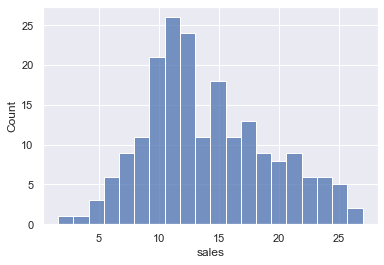

In [53]:
sns.histplot(data=df, x='sales', bins=20)

In [54]:
mean_absolute_error(y_test,test_predictions)

1.4937750024728969

In [56]:
np.sqrt(mean_squared_error(y_test, test_predictions)) # RMSE

1.9307843822347206

If mean_absolute_error is good but RMSE is bad - it means there are few datapoints that are really off (outliers)

## Residual Plot

In [57]:
test_residuals = y_test - test_predictions

In [58]:
test_residuals

95     0.313269
15     1.213775
30    -0.267530
158   -3.510865
128    2.447891
         ...   
97     0.220480
31     0.443402
12    -1.923119
35    -3.800038
119   -0.306115
Name: sales, Length: 66, dtype: float64

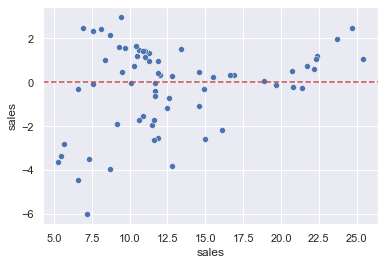

In [61]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='r',ls='--')

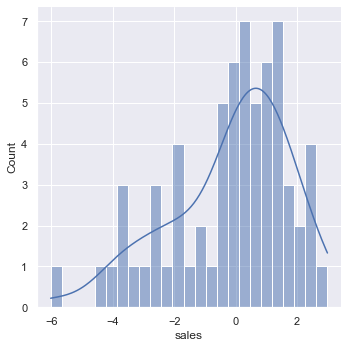

In [63]:
sns.displot(test_residuals, bins=25,kde=True)

## Model Deployment

In [64]:
final_model = LinearRegression()

In [65]:
final_model.fit(X,y)

LinearRegression()

In [67]:
final_model.coef_ # Returns beta coefficients - Increase of 1 unit for tv will increase sales unit by 0.045

array([ 0.04576465,  0.18853002, -0.00103749])

In [68]:
y_hat = final_model.predict(X)

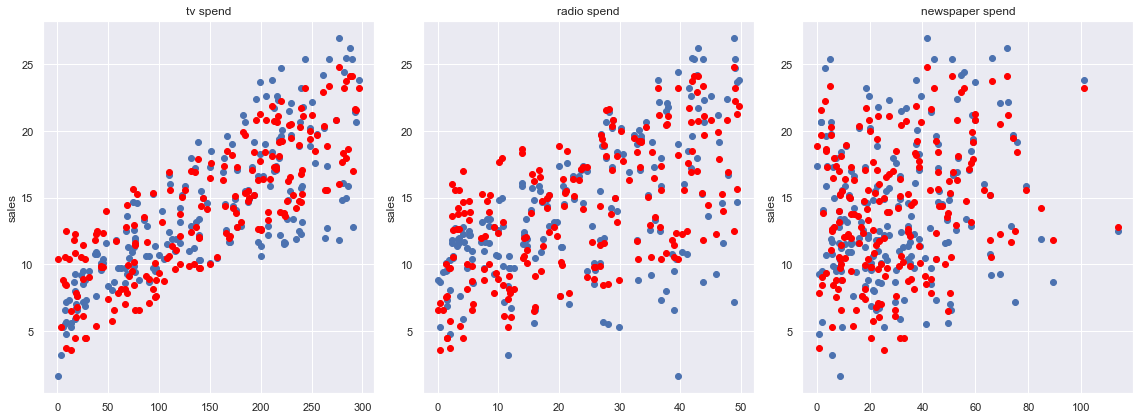

In [69]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['tv'], df['sales'], 'o')
axes[0].plot(df['tv'], y_hat, 'o', color='red')
axes[0].set_ylabel('sales')
axes[0].set_title('tv spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o', color='red')
axes[1].set_ylabel('sales')
axes[1].set_title('radio spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_hat, 'o', color='red')
axes[2].set_ylabel('sales')
axes[2].set_title('newspaper spend')

plt.tight_layout()

In [70]:
from joblib import dump, load

In [71]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [72]:
loaded_model = load('final_sales_model.joblib')

In [73]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [74]:
# 149 TV, 22 Radio, 12 Newspaper
# Sales
campaign = [[149, 22, 12]]

In [75]:
loaded_model.predict(campaign)

array([13.893032])